In [ ]:
from utils.FeatureCalculator import FeatureCalculator
import numpy as np
import pandas as pd
import os

# display the current working directory
display("Current working directory: {0}".format(os.getcwd()))

data_path = '../Dataset_Cleaned/'
display(os.path.isfile(data_path+'LiteratureDataset_Corrosion_YW_v3.xlsx'))

### Feature Calculation for Alloy Components

**Description**:prepares and processes data about alloy compositions, specifically it creates a `FeatureCalculator` object from the defined compositions, then calculates and prints the corresponding alloy features.


In [ ]:
# Define a list of component elements and their corresponding fractions
compo_elem = ["Ni", "Cr", "Mo", "Ti", "Fe"]
ele_frac = np.array([43.8, 38.3, 2.44, 1.04, 0])

# Create a dictionary mapping each element to its corresponding fraction,
ele_frac_dict = {elem: frac for elem, frac in zip(
    compo_elem, ele_frac)}

# Prepare data in the format required for FeatureCalculator - a list of tuples,
# where each tuple contains a list of elements and their corresponding fractions
compositions = [(list(ele_frac_dict.keys()), list(ele_frac_dict.values()))]

print(compositions)

# Create a FeatureCalculator object with the prepared compositions
calculator = FeatureCalculator(compositions)

# Calculate the features using the FeatureCalculator object
features = calculator.calculate_features()

print(features)

### Data Loading, Feature Calculation, and Extraction

Reads various datasets from Excel files, calculates specific features for each material composition in these datasets using a custom `FeatureCalculator` class, extracts relevant data from the corrosion and hardness datasets, and displays the first rows of the extracted data.


In [ ]:
import pandas as pd
from utils.FeatureCalculator import FeatureCalculator

# Initialization of the constants and the data to be loaded
feature_names = ["a", "delta_a", "Tm", "sigma_Tm", "Hmix", "sigma_Hmix", "ideal_S",
                 "elec_nega", "sigma_elec_nega", "VEC", "sigma_VEC", "bulk_modulus", "sigma_bulk_modulus"]

# Lists of filenames, elements for each file, and the header rows for the data in each file
data_file_names = ["LiteratureDataset_Corrosion_YW_v3.xlsx",
                   "LiteratureDataset_Hardness_YW_v3.xlsx",
                   "MultiTaskModel_NiCrCoVFe_KW99_at_pct.xlsx",
                   "MultiTaskModel_NiCrCoVFe_KW99_wt_pct.xlsx",
                   "MultiTaskModel_NiCrMoTiFe_KW131_at_pct.xlsx",
                   "MultiTaskModel_NiCrMoTiFe_KW131_wt_pct.xlsx"]
element_columns = [['Fe', 'Cr', 'Ni', 'Mo', 'W', 'N', 'Nb', 'C', 'Si', 'Mn',
                    'Cu', 'Al', 'V', 'Ta', 'Ti', 'Co', 'Mg', 'Y'],
                   ['Fe', 'Cr', 'Ni', 'Mo', 'W', 'N', 'Nb', 'C', 'Si', 'Mn',
                    'Cu', 'Al', 'V', 'Ta', 'Ti', 'Co', 'Mg', 'Y', 'Zr', 'Hf'],
                   ['Ni', 'Cr', 'Co', 'V', 'Fe'],
                   ['Ni', 'Cr', 'Co', 'V', 'Fe'],
                   ['Ni', 'Cr', 'Mo', 'Ti', 'Fe'],
                   ['Ni', 'Cr', 'Mo', 'Ti', 'Fe']]

df_header_list = [2, 2, 0, 0, 0, 0, 0, 0]
df_compo = pd.DataFrame(columns=['Fe', 'Cr', 'Ni', 'Mo', 'W', 'N', 'Nb', 'C', 'Si', 'Mn',
                                 'Cu', 'Al', 'V', 'Ta', 'Ti', 'Co', 'Mg', 'Y', 'Zr', 'Hf'])
features_dfs = []

# Processing each data file along with the corresponding elements
for i in range(len(data_file_names)):
    # Load and preprocess data from each excel file
    data_df = pd.read_excel(
        data_path + data_file_names[i], header=df_header_list[i])
    # print(data_df.columns)
    element_fractions = data_df[element_columns[i]].fillna(0)

    # Calculate features for each composition
    compositions = [(element_columns[i], element_fraction)
                    for element_fraction in element_fractions.values]
    feature_calculator = FeatureCalculator(compositions)
    calculated_features = feature_calculator.calculate_features()

    # Store the calculated features in a DataFrame
    features_df = pd.DataFrame(calculated_features, columns=feature_names)
    features_dfs.append(features_df)

    # Extract and store specific data and features for the corrosion and hardness datasets
    if i == 0:  # Corrosion dataset
        df_C_compo, df_C_specific_testing, df_C_specific_features, df_C_output = element_fractions, data_df[[
            'TestTemperature_C', 'ChlorideIonConcentration', 'pH', 'ScanRate_mVs']], features_df, data_df[['AvgPittingPotential_mV']]

        # now I want to make df_C_compo have the same columns as df_compo
        df_C_compo = pd.concat([df_C_compo, df_compo],
                               axis=0, ignore_index=True).fillna(0)
        display(df_C_compo.head(1))

    if i == 1:  # Hardness dataset
        df_H_compo, df_H_specific_features, df_H_output = element_fractions, features_df, data_df[[
            'converted HV']]
        df_H_compo = pd.concat([df_H_compo, df_compo],
                               axis=0, ignore_index=True).fillna(0)
        display(df_H_compo.head(1))


# Display the first row of the specific data, features, and output for the corrosion and hardness datasets
display(df_C_compo.head(1), df_C_specific_testing.head(1),
        df_C_specific_features.head(1), df_C_output.head(1))
display(df_H_compo.head(1), df_H_specific_features.head(1), df_H_output.head(1))

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# concatenate the below dataframes
df_C = pd.concat([df_C_compo, df_C_specific_testing,
                 df_C_specific_features, df_C_output], axis=1)

display(df_C.head(1))

# Plot 1 for the correlation heatmap
# Compute the correlation matrix
corr_matrix = df_C.corr().abs()

plt.figure(figsize=(15, 15), dpi=150)

# Drop columns where all values are NaN
corr_matrix = corr_matrix.loc[:, ~corr_matrix.isna().all(axis=0)]

# Drop rows where all values are NaN
corr_matrix = corr_matrix.loc[~corr_matrix.isna().all(axis=1), :]

sns.heatmap(corr_matrix, annot=True, fmt=".1f", cmap='RdGy_r',
            cbar_kws={'label': 'Correlation Coefficient'}, annot_kws={"size": 8})  # adjust size as needed
plt.title("Correlation matrix of the features")
plt.tight_layout()
plt.show()

# Plot 2 for the correlation of each feature with the target
plt.figure(figsize=(15, 5), dpi=150)
df_C.drop('AvgPittingPotential_mV', axis=1).apply(lambda x: x.corr(
    df_C['AvgPittingPotential_mV'])).abs().plot(kind='bar')
plt.title("Correlation of the features with the AvgPittingPotential_mV")
plt.ylabel("Correlation")
# make x-axis 45 degree angle
# plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

### Now we will do a bit more on feature selection


In [ ]:
import numpy as np
from sklearn.preprocessing import MinMaxScaler

# prepare inputs and outputs for NN
dfs = [df_H_compo, df_H_specific_features, df_H_output,
       df_C_compo, df_C_specific_testing, df_C_specific_features, df_C_output]

# convert to numpy arrays
inputs_outputs = [np.asarray(df.values) for df in dfs]

# assign variables
X1, Y1, H1, X2, Z2, W2, C2 = inputs_outputs

# display(X1.shape, Y1.shape, H1.shape, X2.shape, Z2.shape, W2.shape, C2.shape)

# create the scalers
scalers = {
    "compo": MinMaxScaler(),  # for input compo
    "H_specific_features": MinMaxScaler(),  # for input H specific
    "H_output": MinMaxScaler(),  # for H outputs
    "C_specific_testing": MinMaxScaler(),  # for input C specific
    "C_specific_features": MinMaxScaler(),  # for input C specific
    "C_output": MinMaxScaler()  # for C outputs
}

# fit the scalers
scalers["compo"].fit(np.concatenate((X1, X2)))
scalers["H_specific_features"].fit(Y1)
scalers["H_output"].fit(H1.reshape((-1, 1)))
scalers["C_specific_testing"].fit(Z2)
scalers["C_specific_features"].fit(W2)
scalers["C_output"].fit(C2.reshape((-1, 1)))

# print the min and max values of X1 and X2
print("X1 min:", np.min(X1), "X1 max:", np.max(X1))

# Transform the inputs and outputs
X1_norm = scalers["compo"].transform(X1)
Y1_norm = scalers["H_specific_features"].transform(Y1)
H1_norm = scalers["H_output"].transform(H1.reshape((-1, 1)))
X2_norm = scalers["compo"].transform(X2)
Z2_norm = scalers["C_specific_testing"].transform(Z2)
W2_norm = scalers["C_specific_features"].transform(W2)
C2_norm = scalers["C_output"].transform(C2.reshape((-1, 1)))

# Concatenate X1, Y1 and X2, Z2, W2 for model training
X_H_norm = np.concatenate((X1_norm, Y1_norm), axis=1)
X_C_norm = np.concatenate((X2_norm, Z2_norm, W2_norm), axis=1)

In [ ]:
from sklearn.inspection import permutation_importance
from sklearn.feature_selection import SelectFromModel
from sklearn.ensemble import RandomForestRegressor
from keras.models import Sequential
from keras.layers import Dense

# print("X_H_norm min:", np.min(X_H_norm), "X_H_norm max:", np.max(X_H_norm))

# Define a function to evaluate feature importance


def evaluate_feature_importance(model, X, y):
    result = permutation_importance(model, X, y, n_repeats=10, random_state=42)
    return result.importances_mean, result.importances_std

# # Define a function to select features
# def select_features(model, X, y):
#     fs = SelectFromModel(model, threshold=0.05)
#     fs.fit(X, y)
#     return fs.transform(X)


# Create a Random Forest model
forestmodel_H = RandomForestRegressor(random_state=0)
forestmodel_H.fit(X_H_norm, H1_norm.ravel())

forestmodel_C = RandomForestRegressor(random_state=0)
forestmodel_C.fit(X_C_norm, C2_norm.ravel())

# print(H1_norm.shape, C2_norm.shape)

# Evaluate the fitting of the model
print("R2 score for H:", forestmodel_H.score(X_H_norm, H1_norm))
print("R2 score for C:", forestmodel_C.score(X_C_norm, C2_norm))

In [ ]:
# Calculate feature importances and their standard deviations
importances_H, std_H = evaluate_feature_importance(
    forestmodel_H, X_H_norm, H1_norm.ravel())
importances_C, std_C = evaluate_feature_importance(
    forestmodel_C, X_C_norm, C2_norm.ravel())

feature_names_H = df_H_compo.columns.append(
    df_H_specific_features.columns).tolist()
feature_names_C = df_C_compo.columns.append(
    df_C_specific_testing.columns).append(df_C_specific_features.columns).tolist()

# now create a dataframe of feature importance and std with the column names of feature names
# Create a dataframe for C
df_feature_importance_C = pd.DataFrame(
    importances_C.reshape(1, -1), columns=feature_names_C)
df_feature_importance_C = pd.concat([df_feature_importance_C, pd.DataFrame(
    std_C.reshape(1, -1), columns=feature_names_C)], axis=0)
df_feature_importance_C.index = ['importance', 'std_dev']
display(df_feature_importance_C)

# Create a dataframe for H
df_feature_importance_H = pd.DataFrame(
    importances_H.reshape(1, -1), columns=feature_names_H)
df_feature_importance_H = pd.concat([df_feature_importance_H, pd.DataFrame(
    std_H.reshape(1, -1), columns=feature_names_H)], axis=0)
df_feature_importance_H.index = ['importance', 'std_dev']
display(df_feature_importance_H)

# match the feature importance with the feature names
df_feature_importance_H_full = pd.DataFrame(columns=feature_names_C)
df_feature_importance_H_full = pd.concat(
    [df_feature_importance_H_full, df_feature_importance_H], axis=0)
df_feature_importance_H_full.index = df_feature_importance_H.index
display(df_feature_importance_H_full)

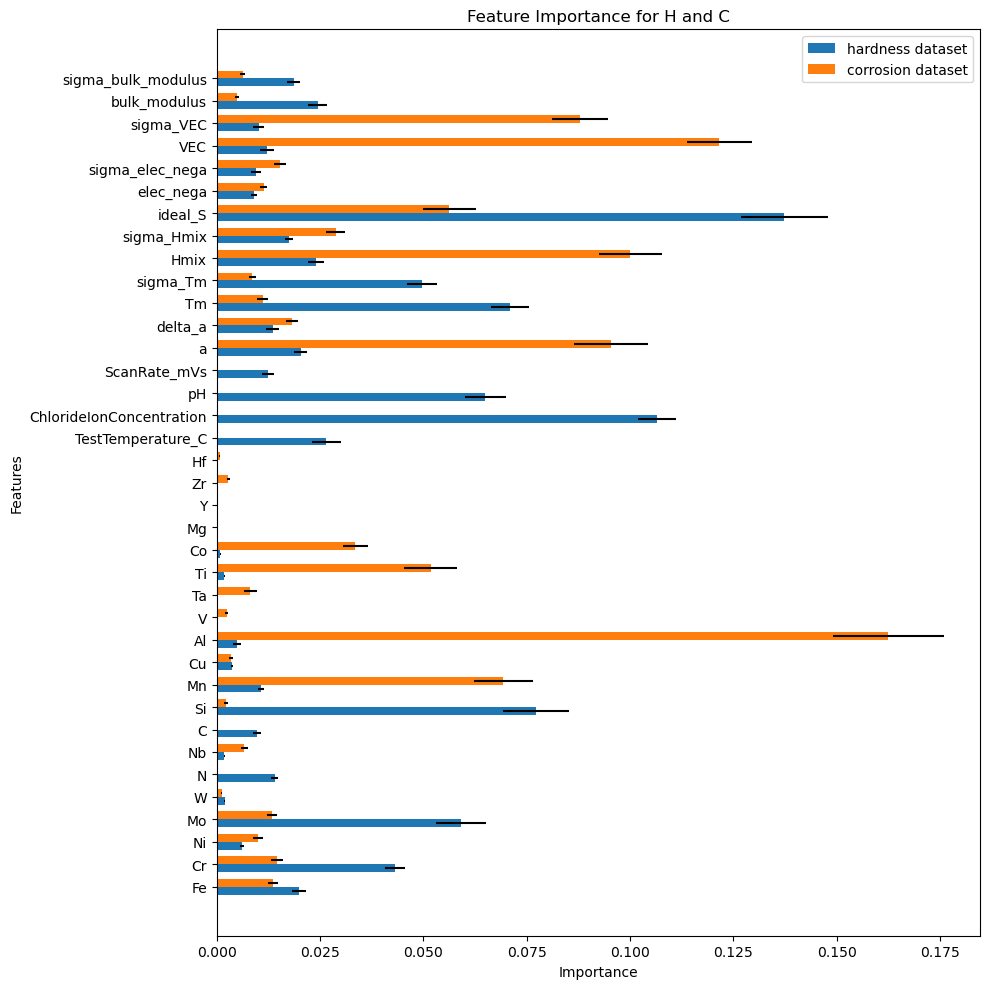

In [19]:
fig, ax = plt.subplots(figsize=(10, 10))
# Define bar width
bar_width = 0.35
index = np.arange(len(df_feature_importance_C.columns))

bar1 = ax.barh(index - bar_width / 2,
               df_feature_importance_C.loc['importance', :],
               bar_width,
               xerr=df_feature_importance_C.loc['std_dev', :],
               label='hardness dataset')
bar2 = ax.barh(index + bar_width / 2,
               df_feature_importance_H_full.loc['importance', :],
               bar_width,
               xerr=df_feature_importance_H_full.loc['std_dev', :],
               label='corrosion dataset')
ax.set_xlabel('Importance')
ax.set_ylabel('Features')
ax.set_title('Feature Importance for H and C')
ax.set_yticks(index)
ax.set_yticklabels(df_feature_importance_C.columns)
ax.legend()

fig.tight_layout()
plt.show()

### Recursive Feature Elimination (RFE)


In [22]:
from sklearn.feature_selection import RFE

# Let's say these are your full features and you have a list defining the group of features
# you're interested in, like this:

all_features_C = np.array(df_C_compo.columns.to_list(
) + df_C_specific_testing.columns.to_list() + df_C_specific_features.columns.to_list())  # all features
# the specific group of features
group_features_C = np.array(df_C_specific_features.columns.to_list())

# Get the indices of the group features in the full feature list
group_indices_C = np.where(np.isin(all_features_C, group_features_C))[0]

# Now extract the subset of X corresponding to group features
X_C_norm_subset = X_C_norm[:, group_indices_C]

# Now you can run RFE or any other feature selection method on this subset
rfe_C = RFE(estimator=forestmodel_C, n_features_to_select=5)
rfe_C = rfe_C.fit(X_C_norm_subset, C2_norm.ravel())
X_C_norm_subset_rfe = rfe_C.transform(X_C_norm_subset)

# Get a mask, or integer index, of the features selected
selected_features_C = rfe_C.support_

# Get a list of the feature names selected
selected_feature_names = group_features_C[selected_features_C]
print(selected_feature_names)

['a' 'Tm' 'ideal_S' 'sigma_VEC' 'bulk_modulus']


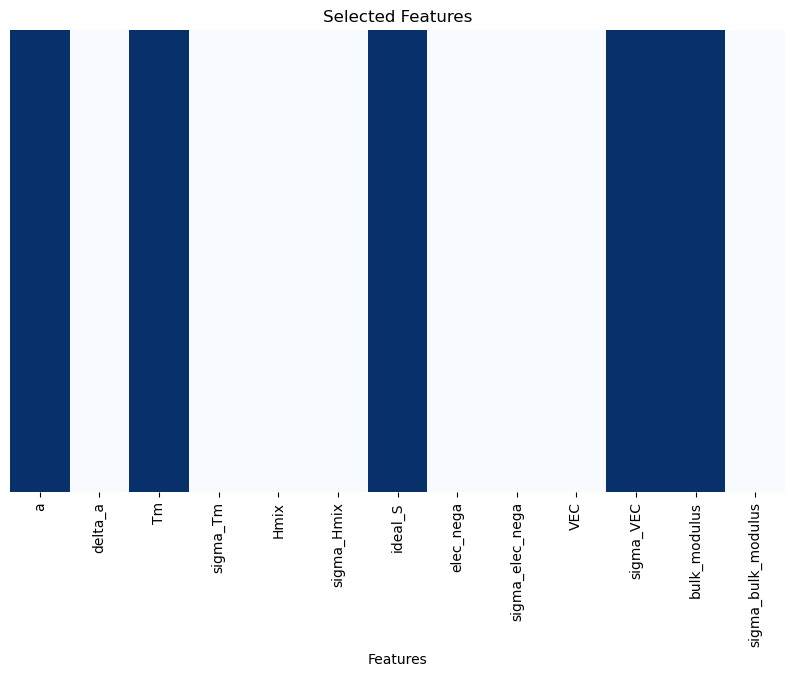

In [23]:
from sklearn.feature_selection import RFECV
from sklearn.model_selection import KFold

# Use the same features and subset
all_features_C = np.array(df_C_compo.columns.to_list(
) + df_C_specific_testing.columns.to_list() + df_C_specific_features.columns.to_list())
group_features_C = np.array(df_C_specific_features.columns.to_list())

group_indices_C = np.where(np.isin(all_features_C, group_features_C))[0]
X_C_norm_subset = X_C_norm[:, group_indices_C]

# Create the RFECV object and compute a cross-validated score.
# The "accuracy" scoring is proportional to the number of correct classifications
rfecv_C = RFECV(estimator=forestmodel_C, step=1, cv=KFold(6),
                scoring='neg_mean_squared_error')

rfecv_C.fit(X_C_norm_subset, C2_norm.ravel())

print("Optimal number of features : %d" % rfecv_C.n_features_)

# Get a mask, or integer index, of the features selected
selected_features_C = rfecv_C.support_

# Get a list of the feature names selected
selected_feature_names = group_features_C[selected_features_C]
print(selected_feature_names)

# Plot number of features VS. cross-validation scores
plt.figure()
plt.xlabel("Number of features selected")
plt.ylabel("Cross validation score (neg mean squared error)")
plt.plot(range(1, len(rfecv_C.grid_scores_) + 1), rfecv_C.grid_scores_)
plt.show()